### Exploratory Data Analysis

1. Analysis **basically here you want to findout whatever you want to predict so at which column it is dependent means what are columns that is really needed for prediction**
- Univariate Analysis (perform univariate analysis on your all columns based on your target variable)
- Multivariate Analysis

2. Feature Engineering
- Creating new columns
- Modifying existing ones

3. Handling Outliers
- Detect outliers
- Modifying existing ones

## This EDA entire process is highly iterative

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Listing down all the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Categorical Columns
- Survived (actually, we will change survived into categorical)
- PClass
- Sex
- SibSp
- Parch
- Embarked

### Numerical Columns
- Age
- Fare
- PassengerID

### Mixed Columns
- Name
- Ticket
- Cabin

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Few conclusions

# 1. Missing values in Age, Cabin, and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, we will have to drop
# 3. Few columns have inappropriate data types

In [9]:
# dropping cabin column
df.drop(columns=['Cabin'], inplace=True)

In [10]:
# Imputing missing values for age
# strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
# Imputing missing values for embarked
# finding the most appeared value in embarked column
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
# S it is
df['Embarked'].fillna('S', inplace=True)

In [13]:
# want to check one more thing...
# Should I change the SibSp and Parch to categories
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [14]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

### Changing data type for the following columns
- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [15]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


### after finning missing values and changing data types our memory usage also has decreased

In [17]:
### Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
df['Survived'].value_counts().values

array([549, 342], dtype=int64)

Out of 891 62 people died in the accident


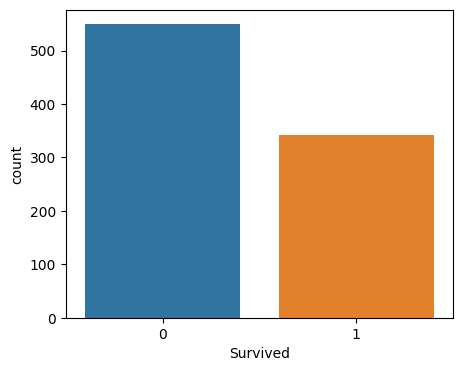

In [20]:
# Univariate Analysis
# Let's start with the survived col

plt.figure(figsize=(5, 4))
sns.countplot(x='Survived', data=df)
death_percent = round((df['Survived'].value_counts().values[0]/len(df) * 100))

print('Out of 891 {} people died in the accident'.format(death_percent))
plt.show()

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


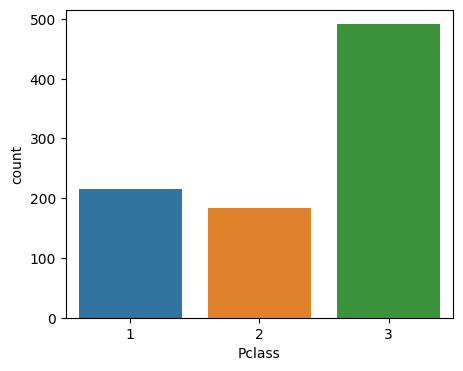

In [21]:
# Pclass column
plt.figure(figsize=(5, 4))
print((df['Pclass'].value_counts()/len(df) * 100))
sns.countplot(x='Pclass', data=df)
plt.show()

# Conclusion : Pclass was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


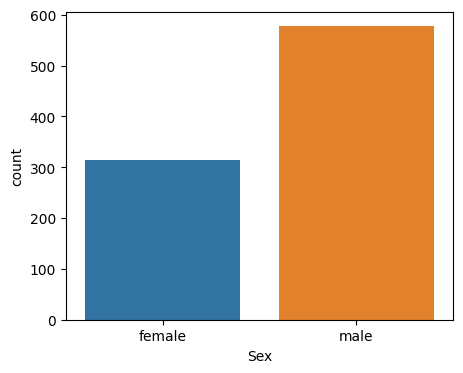

In [22]:
# Sex column
plt.figure(figsize=(5, 4))
print((df['Sex'].value_counts()/len(df) * 100))
sns.countplot(x='Sex', data=df)
plt.show()

# Conclusion : males are the more than the females

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


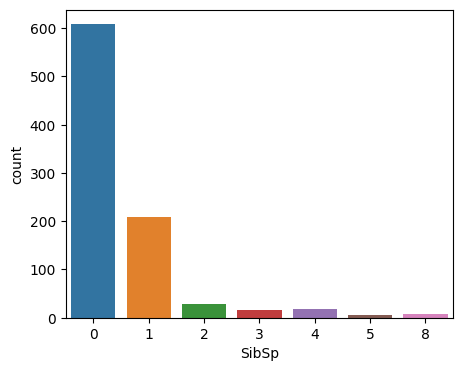

In [23]:
# SibSp column
plt.figure(figsize=(5, 4))
print((df['SibSp'].value_counts()))
sns.countplot(x='SibSp', data=df)
plt.show()

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


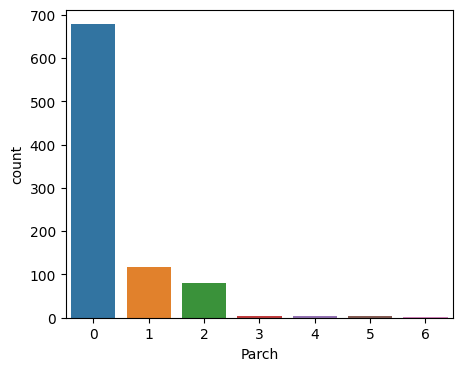

In [24]:
# Parch column
plt.figure(figsize=(5, 4))
print((df['Parch'].value_counts()/len(df) * 100))
sns.countplot(x='Parch', data=df)
plt.show()

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


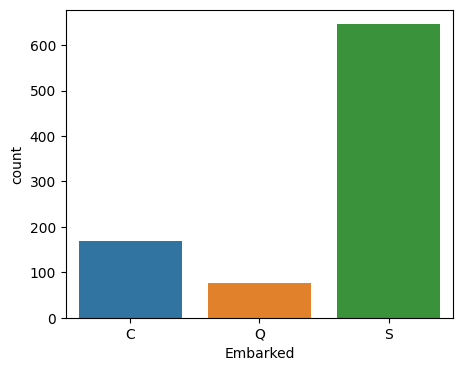

In [25]:
# Embarked column
plt.figure(figsize=(5, 4))
print((df['Embarked'].value_counts()/len(df) * 100))
sns.countplot(x='Embarked', data=df)
plt.show()

0.45956263424701577
0.9865867453652877


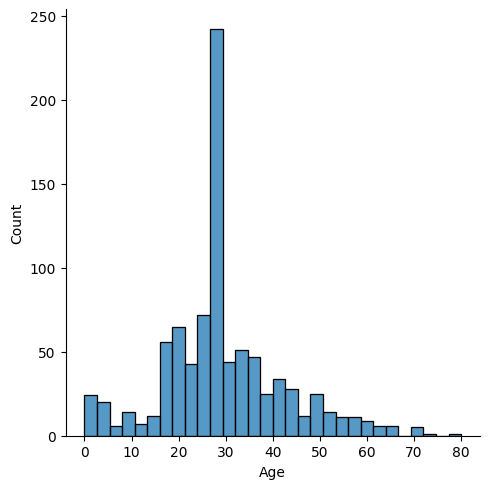

In [26]:
# Age column
sns.displot(df['Age'])
# sns.histplot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())
plt.show()

0.45956263424701577
0.9865867453652877


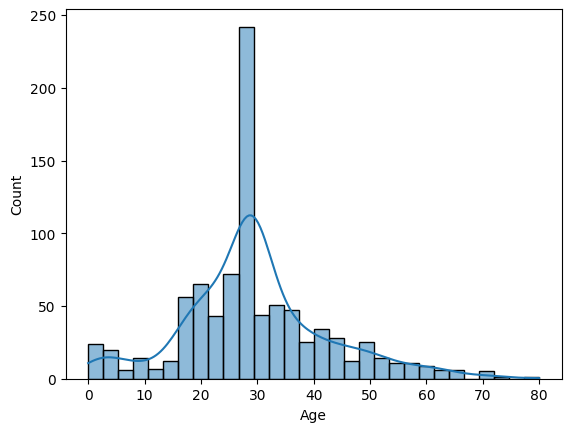

In [27]:
# Age column
sns.histplot(df['Age'], kde=True)
# sns.histplot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())
plt.show()

#### in distplot we don't have parameter called kde=True but in histplot we can use kde=True

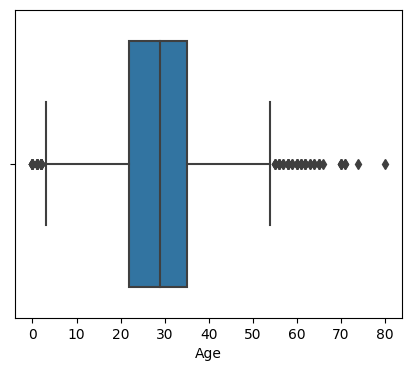

In [28]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['Age'])
plt.show()

In [29]:
# Just out of curiosity
print('People with age in between 60 and 70 are', df[(df['Age']>60) & (df['Age']<70)].shape[0])
print('People with age in between 70 and 75 are', df[(df['Age']>70) & (df['Age']<75)].shape[0])
print('People with age in between 60 and 70 are', df[(df['Age']>75)].shape[0])
print('-'*50)
print('People with age in between 0 and 1 are', df[(df['Age']<1)].shape[0])

People with age in between 60 and 70 are 15
People with age in between 70 and 75 are 3
People with age in between 60 and 70 are 1
--------------------------------------------------
People with age in between 0 and 1 are 7


### Conclusion
- For all practical purposes age can be considered as normal distribution
- Deeper analysis is required for outlier detection

4.787316519674893
33.39814088089868


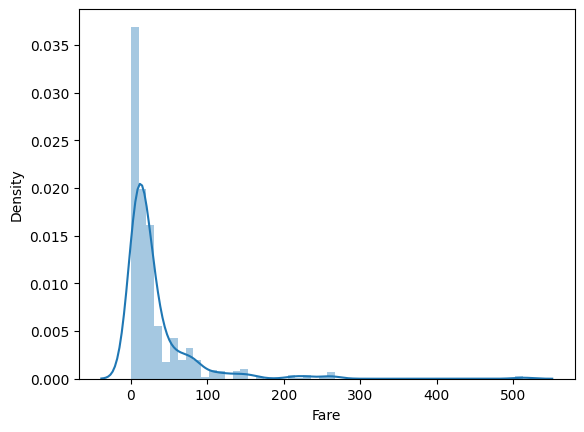

In [30]:
# Fare column
sns.distplot(df['Fare'])
print(df['Fare'].skew())
print(df['Fare'].kurt())
plt.show()

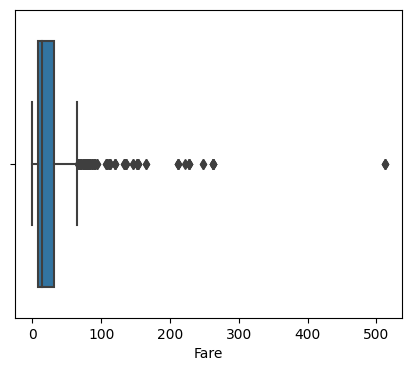

In [31]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['Fare'])
plt.show()

In [32]:
print('People with face in between $200 and $300', df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print('People with fare in greater tah  $300', df[(df['Fare']>300)].shape[0])

People with face in between $200 and $300 17
People with fare in greater tah  $300 3


### Conclsusion
- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there in the data

# MULTIVARIATE ANALYSIS

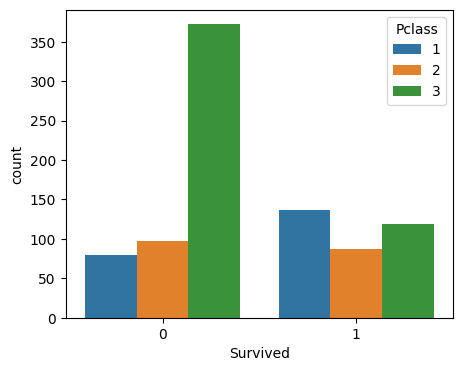

In [33]:
# Survival with Pclass
plt.figure(figsize=(5, 4))
sns.countplot(x='Survived', hue=df['Pclass'], data=df)
plt.show()

In [34]:
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


In [35]:
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
cross_tab

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [36]:
row_sums = cross_tab.sum(axis=1)
row_sums

Pclass
1    216
2    184
3    491
dtype: int64

In [37]:
percenatge_cross_tab = cross_tab.div(row_sums, axis=0) * 100
percenatge_cross_tab

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [38]:
rounded_percenatge_cross_tab = percenatge_cross_tab.round(1)
rounded_percenatge_cross_tab

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


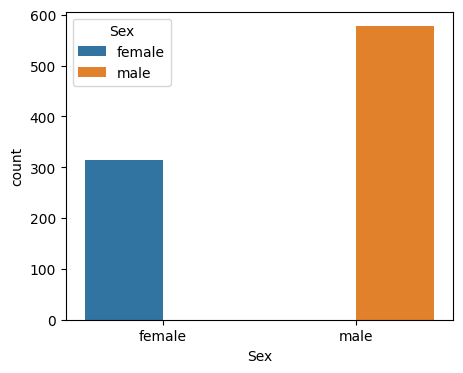

In [39]:
# Survival with Sex
plt.figure(figsize=(5, 4))
sns.countplot(x='Sex', hue=df['Sex'], data=df)
plt.show()

In [40]:
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


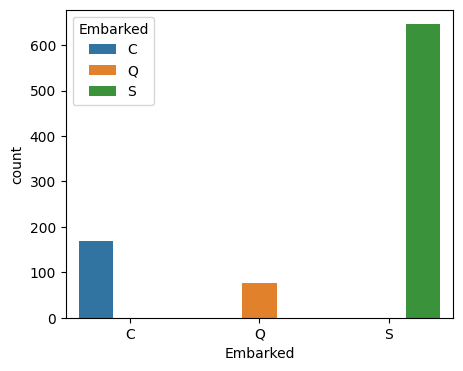

In [41]:
# Survival with Sex
plt.figure(figsize=(5, 4))
sns.countplot(x='Embarked', hue=df['Embarked'], data=df)
plt.show()

In [42]:
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


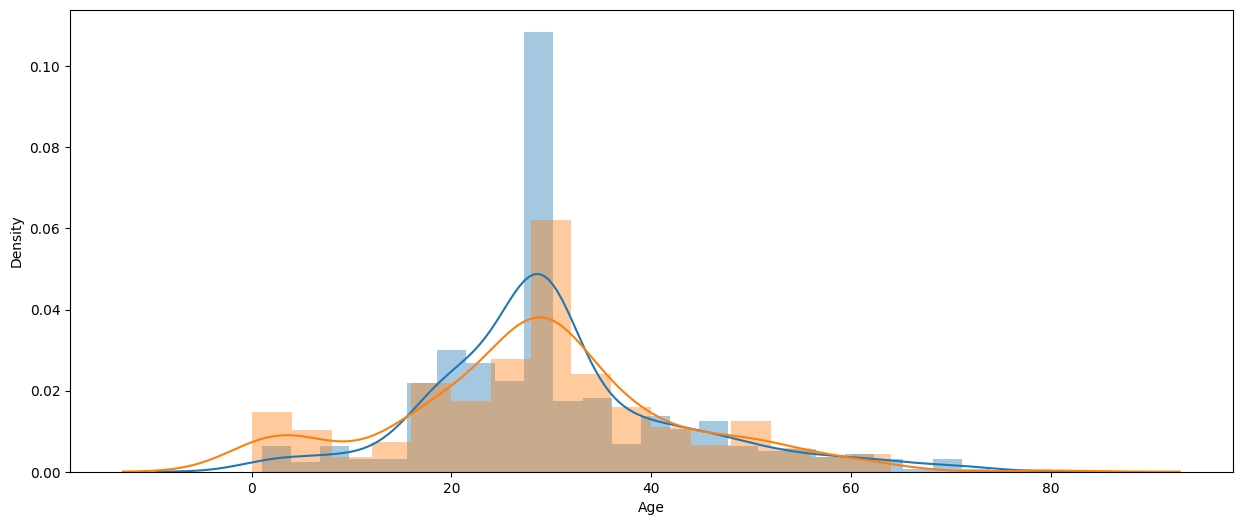

In [43]:
# Survival with Sex
plt.figure(figsize=(15, 6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])
plt.show()

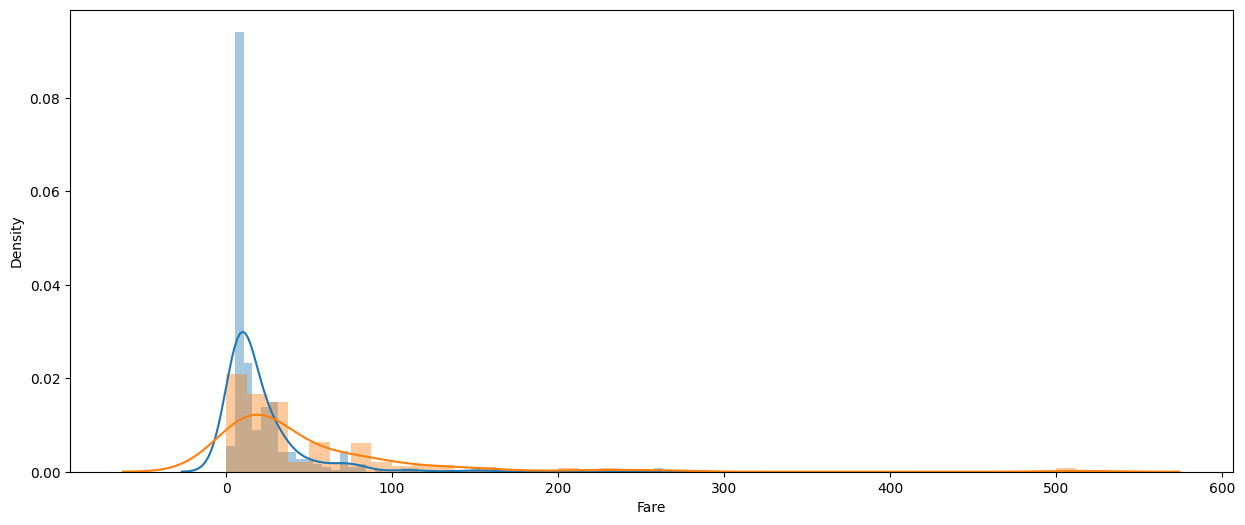

In [44]:
# Survival with Fare
plt.figure(figsize=(15, 6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])
plt.show()

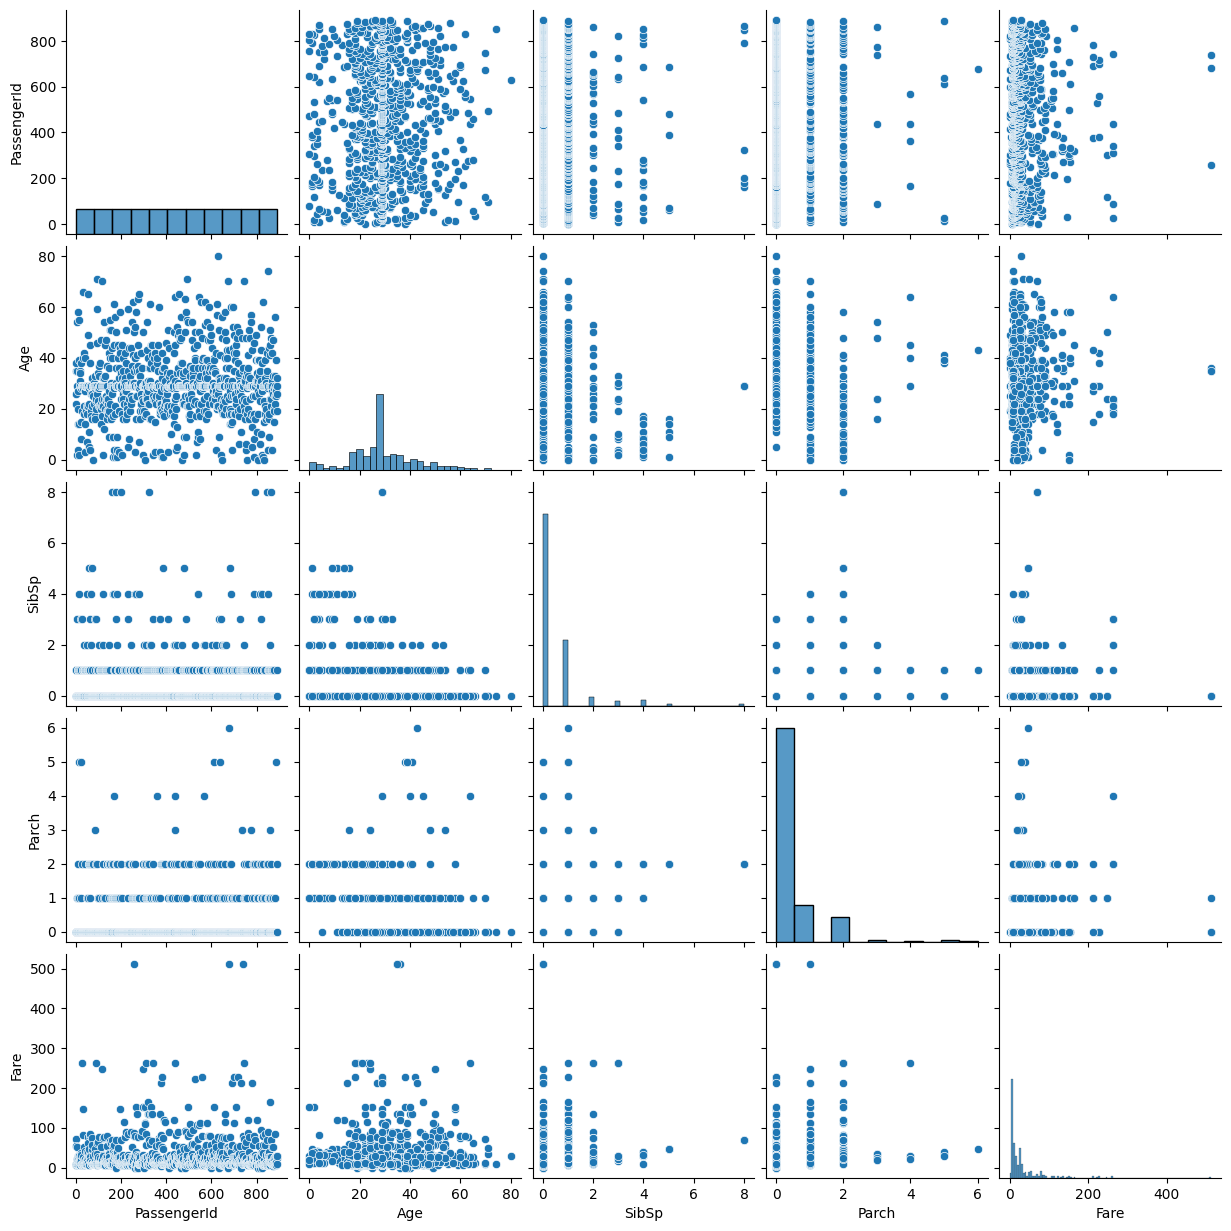

In [45]:
sns.pairplot(df)

In [65]:
# sns.heatmap(df.corr())

In [47]:
# Feature Engineering
# We will create a new column by the name of family which will be sum of SibSp and Parch cols

df['family_size'] = df['Parch'] + df['SibSp']

In [48]:
unique_values = df['family_size'].unique()
unique_values.sort()
unique_values

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10], dtype=int64)

In [49]:
# Now we will engineer a new feature by the name of family type
def family_type(number):
    if number==0:
        return 'Alone'
    elif number >0 and number <= 4:
        return 'Medium'
    else:
        return 'Large'
family_type(5)

'Large'

In [50]:
df['family_size'].apply(family_type)

0      Medium
1      Medium
2       Alone
3      Medium
4       Alone
        ...  
886     Alone
887     Alone
888    Medium
889     Alone
890     Alone
Name: family_size, Length: 891, dtype: object

In [51]:
df['family_type'] = df['family_size'].apply(family_type)
df['family_type']

0      Medium
1      Medium
2       Alone
3      Medium
4       Alone
        ...  
886     Alone
887     Alone
888    Medium
889     Alone
890     Alone
Name: family_type, Length: 891, dtype: object

In [52]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45,1,1,36928,164.8667,S,2,Medium
16,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,Q,5,Large


In [53]:
# Dropping SibSp, Parch and family_size
df.drop(columns=['SibSp', 'Parch', 'family_size'], inplace=True)

In [54]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
677,678,1,3,"Turja, Miss. Anna Sofia",female,18,4138,9.8417,S,Alone
317,318,0,2,"Moraweck, Dr. Ernest",male,54,29011,14.0000,S,Alone


In [55]:
# Survival with family_type
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


### Detecting outliers
#### Numerical Data
- If the data is following normal distribiution, anything beyond 3SD - mean + 3SD can be considered as an outlier
- If the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5IQR and Q3 + 1.5 IQR

#### Categorical Data
- If the col is highly imbalanced for eg male 10000 and female 2 then we can eliminate female

In [56]:
# handling outliers in age (Almost normal)
df = df[df['Age'] < (df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

#### this way we are calculating value till 3SD

In [57]:
df['Age'] < (df['Age'].mean() + 3 * df['Age'].std())

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Age, Length: 884, dtype: bool

In [58]:
(df['Age'].mean() + 3 * df['Age'].std())

66.67730241273762

#### In Fare column we will use IQR method because this is not following a normal distribution

In [59]:
# handling outliers from Fare column

# Finding quartiles

Q1 = np.percentile(df['Fare'], 25)
Q3 = np.percentile(df['Fare'], 75)

outlier_low = Q1 - 1.5 * (Q3 - Q1)
outlier_high = Q1 + 1.5 * (Q3 - Q1)

df = df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,Alone
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,Alone
5,6,0,3,"Moran, Mr. James",male,29,330877,8.4583,Q,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,349909,21.0750,S,Medium
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,211536,13.0000,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,W./C. 6607,23.4500,S,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,C,Alone


In [60]:
# One hot encoding

df.sample(2)

# Cols to be transformed are Pclass, Sex, Embarked, family_type
df = pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first=True)
df.sample(3)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
44,45,1,"Devaney, Miss. Margaret Delia",19,330958,7.8792,False,True,False,True,False,False,False
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27,347742,11.1333,False,True,False,False,True,False,True
483,484,1,"Turkula, Mrs. (Hedwig)",63,4134,9.5875,False,True,False,False,True,False,False


In [61]:
df.drop(['Name', 'Ticket'], inplace=True, axis=1)

In [62]:
df.sample(2)

,PassengerId,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
720,721,1,6,33.0,True,False,False,False,True,False,True
639,640,0,29,16.1,False,True,True,False,True,False,True


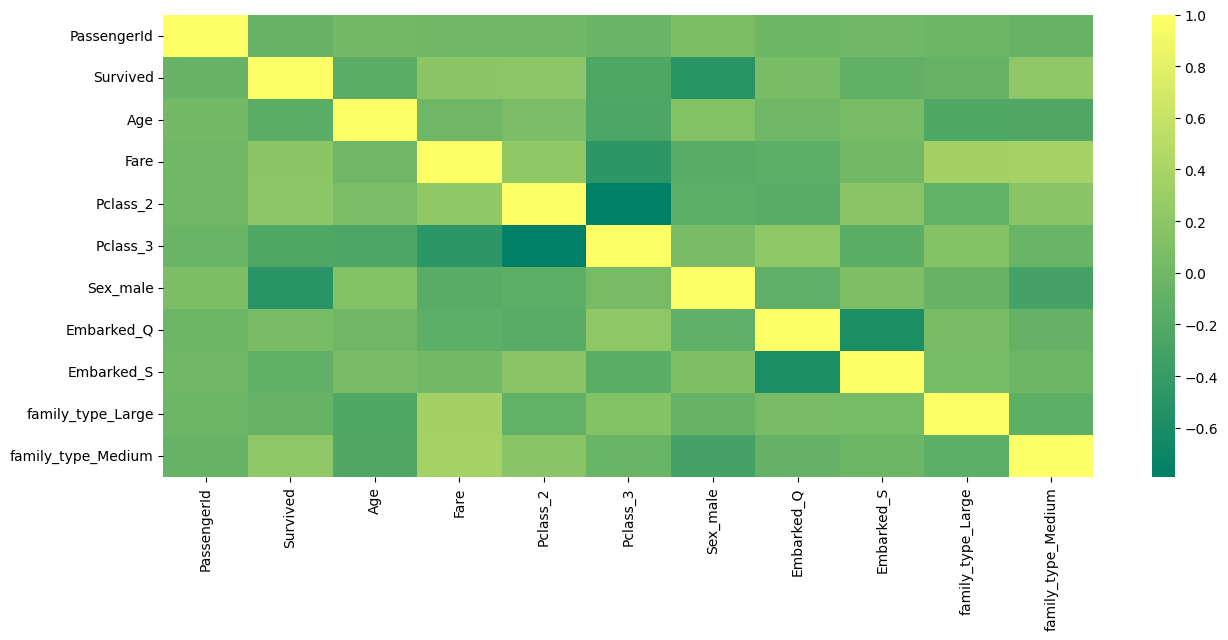

In [63]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), cmap='summer')
plt.show()

### Drawing Conclusions
- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadlist
- Somehow, people going to C survived more
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller families had a higher chance of surviving the accident in comparision to people with large families and travelling alone